In [3]:
import pandas as pd


In [5]:
movies_data=pd.read_csv("movies.csv")
links_data=pd.read_csv("links.csv")
ratings_data=pd.read_csv("ratings.csv")
tags_data=pd.read_csv("tags.csv")

In [11]:
combined_df = pd.merge(movies_data, links_data, on='movieId')
combined_df_1 = pd.merge(combined_df, tags_data, on='movieId')
data = pd.merge(combined_df_1, ratings_data, on='movieId')

In [21]:
print(movies_data.shape,links_data.shape,ratings_data.shape,tags_data.shape)

(9742, 3) (9742, 3) (100836, 4) (3683, 4)


In [31]:
ratings_data.userId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [77]:
print(movies_data.columns,links_data.columns,ratings_data.columns,tags_data.columns)

Index(['movieId', 'title', 'genres'], dtype='object') Index(['movieId', 'imdbId', 'tmdbId'], dtype='object') Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object') Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [17]:
data.head()

,movieId,title,genres,imdbId,tmdbId,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336,pixar,1139045764,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336,pixar,1139045764,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336,pixar,1139045764,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336,pixar,1139045764,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336,pixar,1139045764,17,4.5,1305696483


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      233213 non-null  int64  
 1   title        233213 non-null  object 
 2   genres       233213 non-null  object 
 3   imdbId       233213 non-null  int64  
 4   tmdbId       233213 non-null  float64
 5   userId_x     233213 non-null  int64  
 6   tag          233213 non-null  object 
 7   timestamp_x  233213 non-null  int64  
 8   userId_y     233213 non-null  int64  
 9   rating       233213 non-null  float64
 10  timestamp_y  233213 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 19.6+ MB


In [23]:
data.shape

(233213, 11)

In [29]:
data.duplicated().sum()

0

In [33]:
data.describe()

,movieId,imdbId,tmdbId,userId_x,timestamp_x,userId_y,rating,timestamp_y
count,233213.000000,2.332130e+05,233213.000000,233213.000000,2.332130e+05,233213.000000,233213.000000,2.332130e+05
mean,12319.999443,2.610632e+05,9378.277742,470.683564,1.384774e+09,309.688191,3.966535,1.213524e+09
std,28243.919401,4.414411e+05,36943.139800,153.329632,1.534621e+08,178.206387,0.968637,2.250448e+08
min,1.000000,1.234900e+04,11.000000,2.000000,1.137179e+09,1.000000,0.500000,8.281246e+08
25%,296.000000,1.103570e+05,278.000000,424.000000,1.242494e+09,156.000000,3.500000,1.017365e+09
50%,1198.000000,1.109120e+05,680.000000,477.000000,1.457901e+09,309.000000,4.000000,1.217325e+09
75%,4638.000000,1.724950e+05,1892.000000,599.000000,1.498457e+09,460.000000,5.000000,1.443201e+09
max,193565.000000,5.580390e+06,503475.000000,610.000000,1.537099e+09,610.000000,5.000000,1.537799e+09


In [35]:

print(data['genres'].value_counts())

genres
Comedy|Crime|Drama|Thriller                   56851
Action|Crime|Drama|Thriller                   16725
Action|Adventure|Sci-Fi                       11939
Drama                                          6242
Comedy                                         5486
                                              ...  
Drama|Fantasy|Musical|Romance                     1
Drama|Thriller|Western                            1
Comedy|Crime|Drama|Musical|Mystery|Romance        1
Crime|Drama|Film-Noir|Romance|Thriller            1
Comedy|Crime|Drama|Mystery|Romance                1
Name: count, Length: 370, dtype: int64


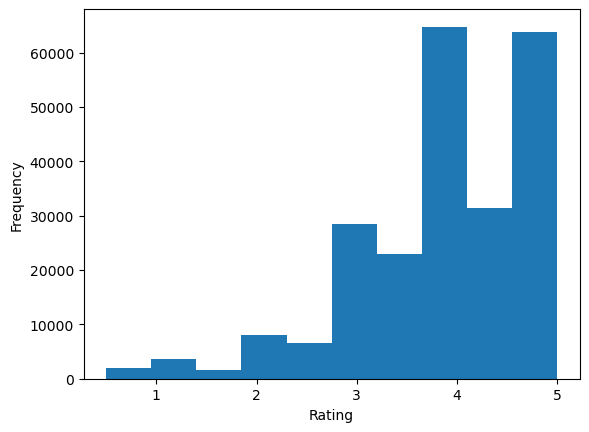

In [37]:
import matplotlib.pyplot as plt
# Histogram
plt.hist(data['rating'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


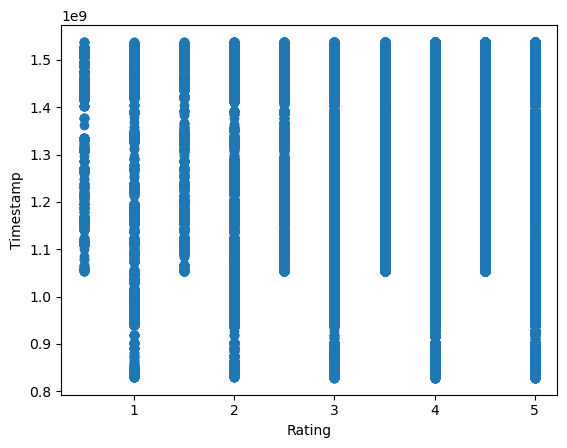

In [39]:

# Scatter plot
plt.scatter(data['rating'], data['timestamp_y'])
plt.xlabel('Rating')
plt.ylabel('Timestamp')
plt.show()

In [41]:

movie_ratings = ratings_data.groupby('movieId').size().reset_index(name='num_ratings')

# Find the movie with the maximum number of ratings
most_rated_movie = movie_ratings.sort_values(by='num_ratings', ascending=False).iloc[0]

# Print the movie title
print(f"The movie with the maximum number of ratings is: {most_rated_movie['movieId']} - {most_rated_movie['num_ratings']} ratings")

The movie with the maximum number of ratings is: 356 - 329 ratings


In [45]:
data[data['movieId']==356]

,movieId,title,genres,imdbId,tmdbId,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y
82481,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,474,shrimp,1137375519,1,4.0,964980962
82482,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,474,shrimp,1137375519,6,5.0,845553200
82483,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,474,shrimp,1137375519,7,5.0,1106635915
82484,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,474,shrimp,1137375519,8,3.0,839463527
82485,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,474,shrimp,1137375519,10,3.5,1455301685
...,...,...,...,...,...,...,...,...,...,...,...
85437,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,567,touching,1525287539,605,3.0,1277097509
85438,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,567,touching,1525287539,606,4.0,1171231370
85439,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,567,touching,1525287539,608,3.0,1117162603
85440,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,567,touching,1525287539,609,4.0,847220869


In [55]:

movie_id = movies_data[movies_data['title'] == 'Fight Club (1999)']['movieId'].values[0]

print(f"Movie ID for Matrix, The (1999): {movie_id}")


Movie ID for Matrix, The (1999): 2959


In [49]:
matrix_movie_id = 2571  # Replace with the actual movie ID from your dataset

# Filter tags for the movie
matrix_tags = tags_data[tags_data['movieId'] == matrix_movie_id]['tag']

# Print the tags
print("Tags for Matrix, The (1999):")
print(matrix_tags)

Tags for Matrix, The (1999):
815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


In [53]:

terminator2_movie_id = 589  # Replace with the actual movie ID from your dataset

# Filter ratings for the movie
terminator2_ratings = ratings_data[ratings_data['movieId'] == terminator2_movie_id]['rating']

# Calculate the average rating
average_rating = terminator2_ratings.mean()

# Print the average rating
print(f"Average rating for Terminator 2: Judgment Day (1991): {average_rating}")

Average rating for Terminator 2: Judgment Day (1991): 3.970982142857143


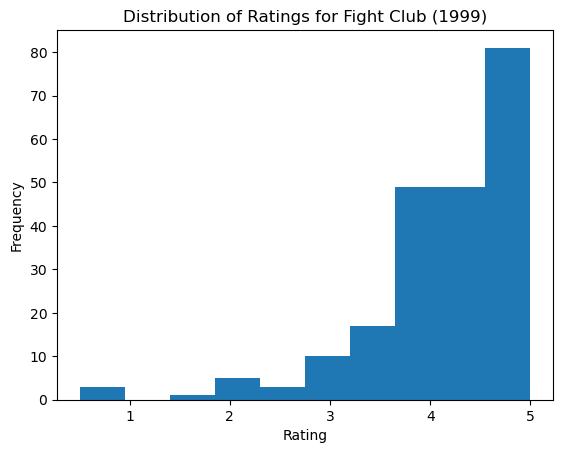

In [57]:

fight_club_movie_id = 2959  # Replace with the actual movie ID from your dataset

# Filter ratings for the movie
fight_club_ratings = ratings_data[ratings_data['movieId'] == fight_club_movie_id]['rating']

# Create a histogram
plt.hist(fight_club_ratings, bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Fight Club (1999)')
plt.show()

In [59]:

grouped_ratings = ratings_data.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename columns for clarity
grouped_ratings.columns = ['movieId', 'num_ratings', 'avg_rating']

# Inner join with movies data to get movie titles
merged_df = pd.merge(movies_data, grouped_ratings, on='movieId')

# Filter only movies with more than 50 ratings
filtered_df = merged_df[merged_df['num_ratings'] > 50]

# Now you can use the filtered_df for further analysis and answering questions

In [61]:
# Assuming you've already performed the mandatory operations and have the filtered_df
most_popular_movie = filtered_df.sort_values(by='avg_rating', ascending=False).iloc[0]

print("Most popular movie based on average user ratings:")
print(most_popular_movie['title'])

Most popular movie based on average user ratings:
Shawshank Redemption, The (1994)


In [63]:
# Assuming you've already performed the mandatory operations and have the filtered_df
top_5_movies = filtered_df.sort_values(by='num_ratings', ascending=False).head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top_5_movies[['title', 'num_ratings']])

Top 5 popular movies based on number of user ratings:
                                 title  num_ratings
314                Forrest Gump (1994)          329
277   Shawshank Redemption, The (1994)          317
257                Pulp Fiction (1994)          307
510   Silence of the Lambs, The (1991)          279
1938                Matrix, The (1999)          278


In [65]:
# Assuming you've already performed the mandatory operations and have the filtered_df

# Filter for Sci-Fi movies
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

# Sort by number of ratings and select the third most popular
third_most_popular_sci_fi = sci_fi_movies.sort_values(by='num_ratings', ascending=False).iloc[2]

print("Third most popular Sci-Fi movie based on number of user ratings:")
print(third_most_popular_sci_fi['title'])

Third most popular Sci-Fi movie based on number of user ratings:
Jurassic Park (1993)


In [73]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      233213 non-null  int64  
 1   title        233213 non-null  object 
 2   genres       233213 non-null  object 
 3   imdbId       233213 non-null  int64  
 4   tmdbId       233213 non-null  float64
 5   userId_x     233213 non-null  int64  
 6   tag          233213 non-null  object 
 7   timestamp_x  233213 non-null  int64  
 8   userId_y     233213 non-null  int64  
 9   rating       233213 non-null  float64
 10  timestamp_y  233213 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 19.6+ MB


In [79]:

filtered_data = merged_data[merged_data['imdbId'].notnull()].sort_values(by='rating', ascending=False)

# Get the movie ID with the highest IMDB rating
highest_rated_movie_id = filtered_data['movieId'].iloc[0]

print("Movie ID with the highest IMDB rating:", highest_rated_movie_id)

Movie ID with the highest IMDB rating: 1198


In [81]:
import pandas as pd

# Load your merged dataset
merged_data = data.copy()  # Replace with your actual file path

# Filter for movies with valid IMDB IDs and sort by IMDB rating
filtered_data = merged_data[merged_data['imdbId'].notnull()].sort_values(by='rating', ascending=False)

# Get the movie ID with the highest IMDB rating
highest_rated_movie_id = filtered_data['movieId'].iloc[0]

print("Movie ID with the highest IMDB rating:", highest_rated_movie_id)

Movie ID with the highest IMDB rating: 1198


In [83]:

sci_fi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi')]

# Sort by IMDB rating and select the top movie
highest_rated_sci_fi = sci_fi_movies.sort_values(by='rating', ascending=False).iloc[0]

# Get the movie ID
movie_id = highest_rated_sci_fi['movieId']

print("Movie ID with the highest IMDB rating:", movie_id)

Movie ID with the highest IMDB rating: 1196


In [85]:

filtered_data = merged_data[merged_data['imdbId'].notnull()].sort_values(by='rating', ascending=False)

# Get the movie ID with the highest IMDB rating
highest_rated_movie_id = filtered_data['movieId'].iloc[0]

print("Movie ID with the highest IMDB rating:", highest_rated_movie_id)

Movie ID with the highest IMDB rating: 1198
